# Part 1: Data Loading and Initial Exploration


The data for this project is stored in the `data` folder in your repositories, in the `SOTU.csv` file. The data file is structured as a CSV with columns for president name, speech text, year, and word count in the speech. 

In this section you will:

1. Import the data into a pandas dataframe
2. Perform exploratory data analysis (EDA) including specifically:
- Analyze the number of speeches per president
- Analyze the number of speeches per year
- Analyze the word count distribution
- Analyze the word count distribution accross years using a rug plot
- Analyze the average word count per president
3. Write commentary on your findings

First, create the `conda` environment with the provided yaml file. Note, it's not unusual for it to take ~15 minutes for the environment to fully install.

### Read Data

In [33]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

plt.style.use('seaborn-v0_8-dark') 

In [34]:
# Read in SOTU.csv using pandas

sou = pd.read_csv('data/SOTU.csv')

In [36]:
# Make outputs directory 
os.makedirs("outputs", exist_ok=True)

### Exploratory Data Analysis

Replicate the plots below using the hints specified. For each plot, provide some commentary describing the results/anything interesting you might see.

#### Number of Speeches per President

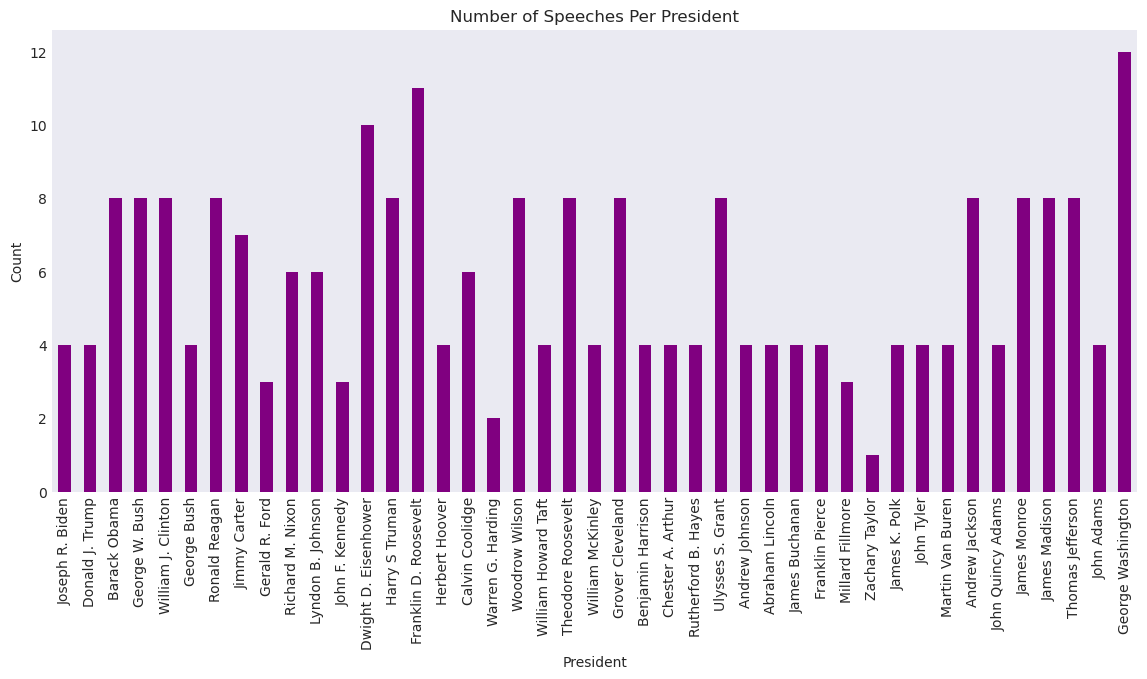

In [37]:
# Use value_counts() on the President column

counts= sou["President"].value_counts()

# Sort in order of SOTU.csv

order_presidents= sou["President"].unique()
counts = counts.reindex(order_presidents)

# Plot number of words per speech and add personal flare
counts.plot(
    kind='bar',
    title='Number of Speeches Per President',
    xlabel='President',
    ylabel='Count',
    figsize=(14, 6),
    color='purple',
    linewidth=5

)
#Export Plot to Outputs
plt.savefig("outputs/numberofspeechesperpresident.png")


#Show Plot
plt.show()

#### Number of Speeches per Year

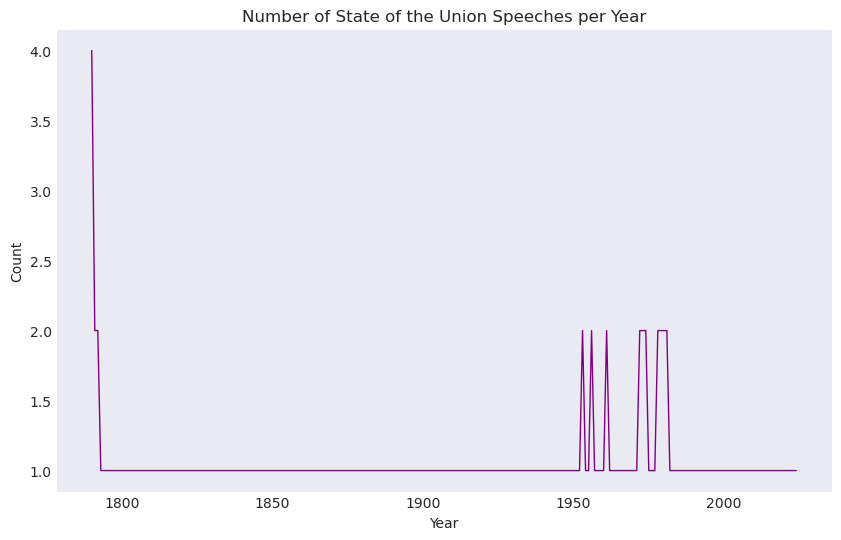

In [29]:
#  Use value counts and sort by years

counts= sou["Year"].value_counts()

# Sort in order of SOTU.csv

order_years= sou["Year"].unique()
counts = counts.reindex(order_years)

# Plot number of state of union speeches per year and add personal flare

counts.plot(
    kind='line',
    title='Number of State of the Union Speeches per Year',
    xlabel='Year',
    ylabel='Count',
    figsize=(10, 6),
    color='purple',
    linewidth=1
)

#Export plot to Outputs

plt.savefig("outputs/wordcountperyear.png")

#Show Plot
plt.show()

#### Word Count Distribution 

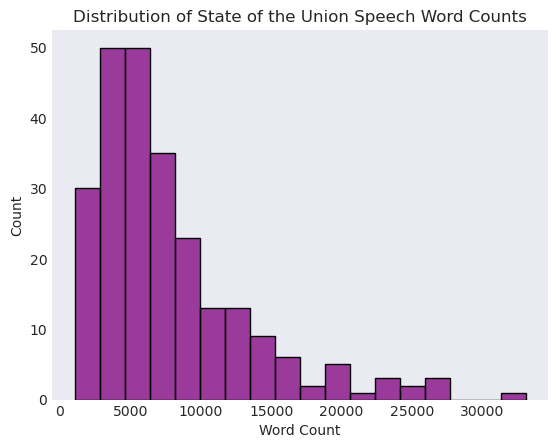

In [30]:
# Plot number distribution of state of the union speech word counts using seaborn.histplot()

#Choose color
color = "purple" 

#Make plot and export to outputs
sns.histplot(sou["Word Count"], bins=18, color = color)
plt.title('Distribution of State of the Union Speech Word Counts')
plt.xlabel('Word Count')
plt.ylabel('Count')
plt.savefig("outputs/distributionofwordcounts.png")

plt.show()

#### Word Count Distribution over Year

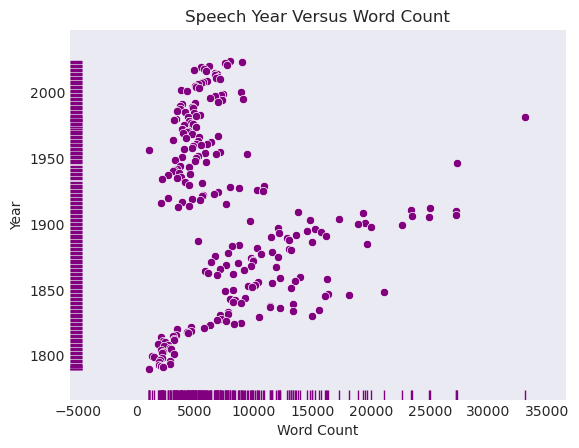

In [31]:
# Plot speech year versus word count s using seaborn.rugplot()
sns.scatterplot(data=sou, y="Year", x="Word Count", color = color)

# Rugs
sns.rugplot(data=sou, y="Year", color = color)
sns.rugplot(data=sou, x="Word Count", color = color)


# Make plot and export to outputs
plt.title('Speech Year Versus Word Count')
plt.xlabel('Word Count')
plt.ylabel('Year')
plt.savefig("outputs/speechvwordcount.png")


plt.show()

#### Word Count Distribution per President

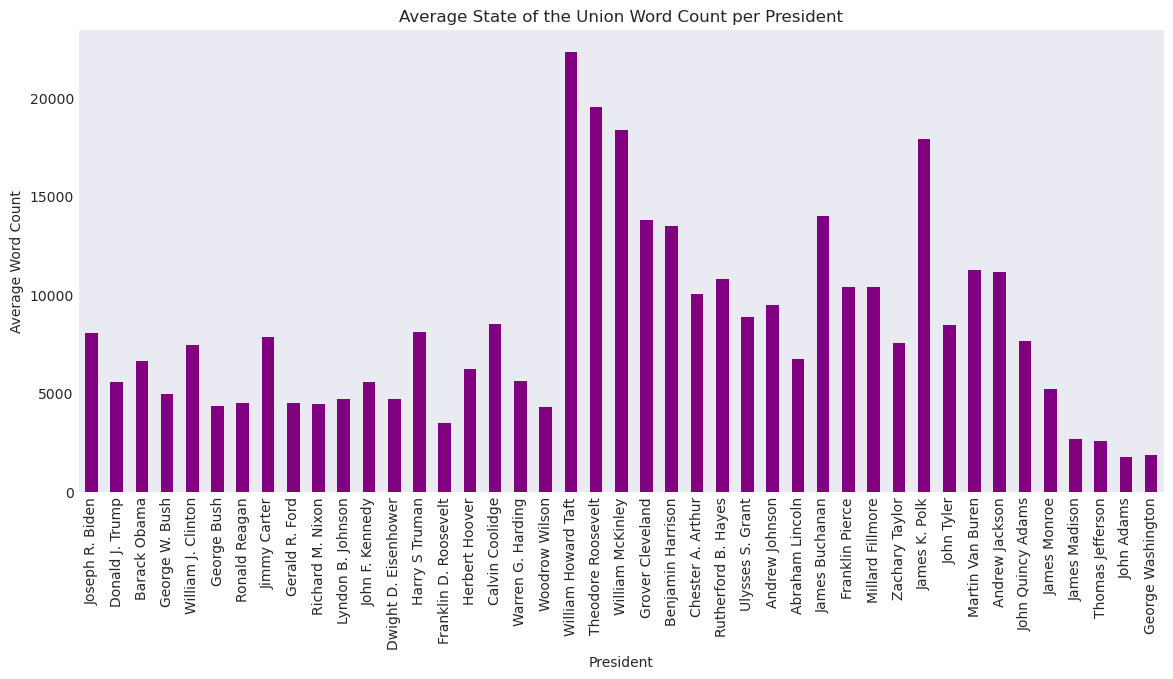

In [32]:

# Using groupby. to get mean word count
avg_wc_president = sou.groupby("President")["Word Count"].mean()

# Sort in order of SOTU.csv
order_presidents= sou["President"].unique()
avg_wc_president = avg_wc_president.reindex(order_presidents)

# Make plot of avg word counts per president 
avg_wc_president.plot(
    kind='bar',
    title='Average State of the Union Word Count per President',
    xlabel='President',
    ylabel='Average Word Count',
    figsize=(14, 6),
    color='purple',
    linewidth=5
)

#Export Plot to Outputs
plt.savefig("outputs/avgwordcountperpresident.png") 

#Show Plot 
plt.show()